
# Perceptron
The Perceptron algorithm finds the linear decision boundary by considering each example $x^{(n)}, y^{(n)} \in \mathcal{D}$, where $y^{(n)} \in \{-1,+1\}$.
If $\hat{y}^{(n)} = w^\top x^{(n)}$ has a different sign from $y^{(n)}$ the weights are updated to *increase* $\hat{y}^{(n)} {y}^{(n)}$. The gradient of
$\hat{y}^{(n)} {y}^{(n)}$ wrt. $w$ is $\frac{\partial}{\partial w} y^{(n)}(w^\top x^{(n)}) = y^{(n)} x^{(n)}$. Therefore, if the example is misclassified
the Perceptron learning algorithm simply updates $w$ using
$$
w^{\{t+1\}} \leftarrow w^{\{t\}} + y^{(n)} x^{(n)}
$$
If the data is linearly separable, the algorithm is guaranteed to converge.
However, if the data is not linearly separable, this procedure does not converge, and oscillates. Below, we use a `max_iters` to in case the data is not linearly seperable. To be consistent with previous classification methods, we assume the input labels are in $\{0,1\}$.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

# Dataset

In the below, we will be using two features of Iris dataset to construct our training, and test dataset. Specifically, we have 80 training data and 20 test data.

In [2]:
from sklearn import datasets
from sklearn.utils import shuffle

dataset = datasets.load_iris()

x, y = dataset['data'][:,2:], dataset['target']      #slice last two features of Iris dataset

x, y = x[y < 2, :], y[y< 2]                          #slice class 0 and 1

# Shuffle and split the data after conversion
combined_data = np.hstack((x, y.reshape(-1, 1)))
shuffled_data = shuffle(combined_data, random_state=42)
shuffled_x = shuffled_data[:, :-1]
shuffled_y = shuffled_data[:, -1]

# Split into training and test datasets
x_train, y_train = shuffled_x[:80], shuffled_y[:80]
x_test, y_test = shuffled_x[80:], shuffled_y[80:]


# Perceptron Class

In the below, we will define the Perceptron class which contains the training procedure in the 'fit' method. **Complete the code for problem (1), (2), and (3).**



In [3]:
class Perceptron:

    def __init__(self, max_iters=10000):
        """Initialize the Perceptron parameters."""
        self.max_iters = max_iters

    def fit(self, x, y):
        """Train the Perceptron."""
        # Ensure x has two dimensions
        if x.ndim == 1:
            x = x[:, None]

        n, D = x.shape

        # Initialize the weights and bias
        theta = np.zeros(D)
        theta_0 = 0

        # Convert target labels from 0,1 to -1,+1
        y = 2 * y - 1

        t = 0
        change = True  # A flag to check if the weights are updated

        # Training loop
        while change and t < self.max_iters:
        #while t < self.max_iters:
            change = False
            for i in range(0,n):
                ### ----------------------------------------
                # Predict the output for the current sample
                yh = np.sign(y[i]*(np.dot(theta,x[i])+theta_0)) # problem (1) (hint: use np.sign, np.dot)
                ###-----------------------------------------


                ### ----------------------------------------
                # Update the weights and bias
                if yh <= 0:
                  theta = theta + y[i]*x[i]# problem (2)
                  theta_0 = theta_0 + y[i]# problem (3)
                else:
                  continue
                ###-----------------------------------------

                change = True

                t += 1
                if t >= self.max_iters:
                    break
        # Check if the algorithm converged
        if change:
            print(f'did not converge after {t} updates')
        else:
            print(f'converged after {t} iterations!')

        self.theta = theta
        self.theta_0 = theta_0

        return





Let's define the model and perform the training.

In [4]:
model = Perceptron()

model.fit(x_train, y_train)

converged after 7 iterations!


Let's plot the decision boundary $w^\top x = 0$ using the trained Perceptron model.

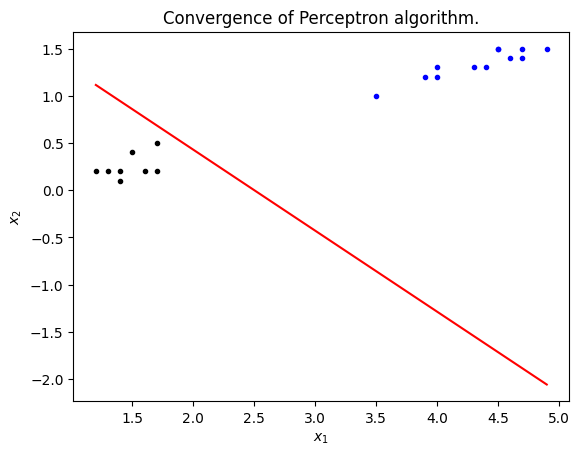

In [5]:
  import matplotlib.pyplot as plt

  plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'k.' )
  plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'b.' )
  x_line = np.linspace(np.min(x_test[:,0]), np.max(x_test[:,0]), 100)

  coef = -model.theta[0] / model.theta[1]  # slope of the decision boundary
  plt.plot(x_line, coef * x_line - model.theta_0 / model.theta[1], 'r-')

  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')
  plt.title('Convergence of Perceptron algorithm.')
  plt.show()